<a href="https://colab.research.google.com/github/Keerthi87140/ICP-WEEK3/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1.Data Manipulation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/data.csv')

# View the first few rows
print("First 5 rows of data.csv:")
print(df.head())


First 5 rows of data.csv:
   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0
3        45    109       175     282.4
4        45    117       148     406.0


In [ ]:
print("\nBasic Statistical Description:")
print(df.describe())



Basic Statistical Description:
         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000


In [ ]:
print("\nChecking for null values in each column:")
print(df.isnull().sum())

# Replace null values with mean (numeric columns only)
df.fillna(df.mean(numeric_only=True), inplace=True)

print("\nNull values after replacement:")
print(df.isnull().sum())



Checking for null values in each column:
Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

Null values after replacement:
Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64


In [ ]:
aggregated_data = df[['Duration', 'Calories']].agg(['min', 'max', 'count', 'mean'])
print("\nAggregated data (min, max, count, mean) for Duration and Calories:")
print(aggregated_data)



Aggregated data (min, max, count, mean) for Duration and Calories:
         Duration     Calories
min     15.000000    50.300000
max    300.000000  1860.400000
count  169.000000   169.000000
mean    63.846154   375.790244


In [ ]:
filtered_df_500_1000 = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]
print(f"\nRows where 500 <= Calories <= 1000 (showing top 5 rows):")
print(filtered_df_500_1000.head())



Rows where 500 <= Calories <= 1000 (showing top 5 rows):
    Duration  Pulse  Maxpulse  Calories
51        80    123       146     643.1
62       160    109       135     853.0
65       180     90       130     800.4
66       150    105       135     873.4
67       150    107       130     816.0


In [ ]:
filtered_df_calories_pulse = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]
print(f"\nRows where Calories > 500 and Pulse < 100 (showing top 5 rows):")
print(filtered_df_calories_pulse.head())



Rows where Calories > 500 and Pulse < 100 (showing top 5 rows):
    Duration  Pulse  Maxpulse  Calories
65       180     90       130     800.4
70       150     97       129    1115.0
73       150     97       127     953.2
75        90     98       125     563.2
99        90     93       124     604.1


In [ ]:
df_modified = df.drop('Maxpulse', axis=1)
print("\ndf_modified columns:")
print(df_modified.columns)



df_modified columns:
Index(['Duration', 'Pulse', 'Calories'], dtype='object')


In [ ]:
df.drop('Maxpulse', axis=1, inplace=True)
print("\nColumns in df after deleting 'Maxpulse':")
print(df.columns)



Columns in df after deleting 'Maxpulse':
Index(['Duration', 'Pulse', 'Calories'], dtype='object')


In [ ]:
df['Calories'] = df['Calories'].astype(int)
print("\nData types after converting 'Calories' to int:")
print(df.dtypes)



Data types after converting 'Calories' to int:
Duration    int64
Pulse       int64
Calories    int64
dtype: object


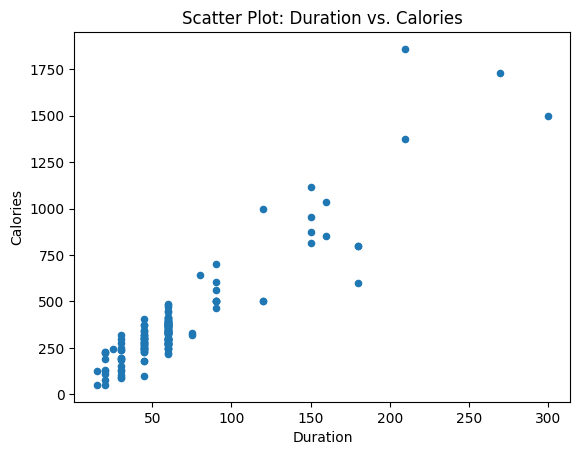

In [ ]:
df.plot.scatter(x='Duration', y='Calories', title='Scatter Plot: Duration vs. Calories')
plt.show()


#2.Linear Regression

In [ ]:
# Libraries needed for linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read the Salary_Data.csv file
salary_df = pd.read_csv('/content/drive/MyDrive/Salary_Data.csv')
print("First 5 rows of Salary_Data.csv:")
print(salary_df.head())


First 5 rows of Salary_Data.csv:
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [ ]:
# Independent (X) and Dependent (y) variables
X = salary_df[['YearsExperience']]
y = salary_df['Salary']

# Splitting dataset into train (2/3) and test (1/3)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/3, random_state=42
)


In [ ]:
# Create Linear Regression model
regressor = LinearRegression()

# Train the model (fit the regressor)
regressor.fit(X_train, y_train)

# Predict using the test data
y_pred = regressor.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error on test data:", mse)



Mean Squared Error on test data: 35301898.887134895


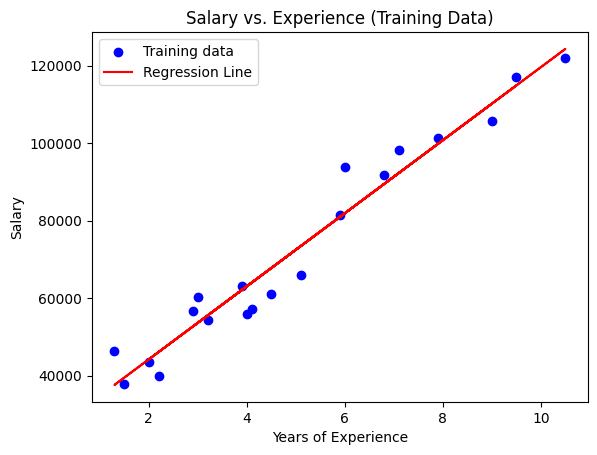

In [ ]:
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, regressor.predict(X_train), color='red', label='Regression Line')
plt.title('Salary vs. Experience (Training Data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


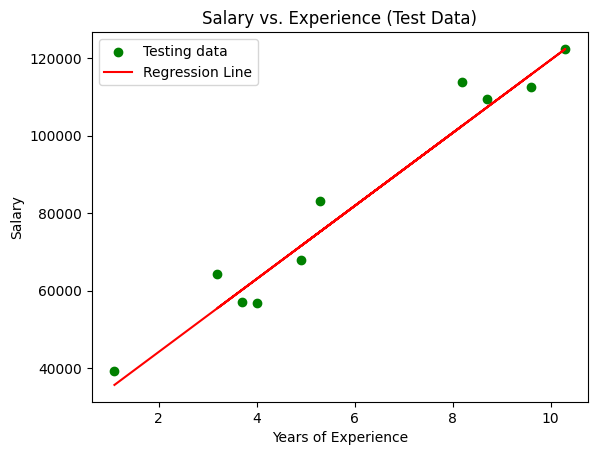

In [ ]:
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Salary vs. Experience (Test Data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()
